# 5.1 Correlation
- sample correlation coefficient: denoted by $r$, 
$$
r = \frac{\sum z_x z_y}{n-1}
$$
where $z_x, z_y$ are the z-socres for x and y:
$$
z_x = \frac{x- \overline{x}}{s_{x}}, z_y = \frac{y- \overline{y}}{s_{y}},
$$
and $s_{x}, s_{y}$ are sample standard deviations of $x,y$.
- The value of 𝒓 is between −𝟏 and +𝟏.
- A correlation coefficient of 𝒓=𝟏 occurs only when all the points in a scatterplot of the data lie exactly on a straight line that slopes upward. Similarly,  𝒓=−𝟏 only when all the points lie exactly on a downward-sloping line.
- The value of 𝒓 is a measure of how 𝒙 and 𝒚 are linearly related.
- The value of 𝒓 does not depend on the unit of measurement for either variable.
- The value of 𝒓 does not depend on which of the two variables is considered 𝒙.
- Correlation measures the extent of association, but association does not imply causation. It frequently happens that two variables are highly correlated not because one is causally related to the other but because they are both strongly related to a third variable.


## Example

In [1]:
import pandas as pd
import numpy as np

url = "https://github.com/cocoxhuang/STAT213/blob/main/Ex05.3.csv?raw=true"
data = pd.read_csv(url)
data

,Age Group,Representative Age,Average Finish Time of Top 10 (min)
0,18-19,18.5,241.1
1,20-24,22.5,181.6
2,25-29,27.5,167.1
3,30-34,32.5,161.4
4,35-39,37.5,160.9
5,40-44,42.5,179.8
6,45-49,47.5,186.5
7,50-54,52.5,194.2
8,55-59,57.5,212.2
9,60-64,62.5,225.3


In [2]:
from scipy.stats import pearsonr

age = data['Representative Age '].values
time = data['Average Finish Time of Top 10 (min)'].values


corr, p = pearsonr(age,time)
print(f"Correlation between age and marathon finish time is: {corr}")

Correlation between age and marathon finish time is: 0.21817857491195636


### Scatterplot of data 

Text(0.5, 1.0, 'Top 10 Marathon time by age group')

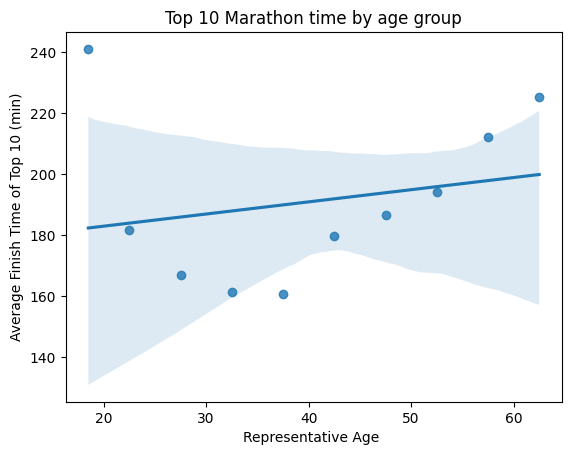

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.regplot(x="Representative Age ", y="Average Finish Time of Top 10 (min)", data=data)
plt.title("Top 10 Marathon time by age group")

# 5.2 Linear regression: Fitting a Line to Bivariate Data
- **Dependent variable**: In a bivariate data set, the variable whose value we would like to predict. The dependent variable is denoted by y. The dependent variable is also sometimes called the response variable.
- **Independent variable**:n a bivariate data set, the variable that will be used to make a prediction of the dependent variable. The independent variable is denoted by x. The independent variable is also sometimes called the predictor variable or the explanatory variable. 
- The equation of a line is $y=𝑎+𝑏𝑥$, where the value of 𝑏 is  the slope of the line and the value of 𝑎 is the intercept.
- **Sum of squared deviations**: 
$$
\sum_{k=1}^n (y_k - (a+b \cdot x_k))^2
$$
- **Least-squares line/sample regression line**: the line that minimizes the sum of squared deviations. We write the equation of the least-squares line as
    $$
    \hat{y} = a + bx,
    $$
    where $\hat{y}$ is the prediction of 𝑦 that results from substituting a particular 𝑥 value into the equation.
    - The slope the least-squares line is:
    $$
    b = r(\frac{s_y}{s_x}) = \frac{\sum_{k=1}^n (x_k- \overline{x})(y_k - \overline{y})}{\sum_{k=1}^n (x_k- \overline{x})^2} = \frac{\sum xy - \frac{(\sum x)(\sum y)}{n}}{\sum x^2 - \frac{(\sum x)^2}{n}}.
    $$
    - The $y$ intercept is $a = \overline{y} - b \overline{x}$.

## Example

In [4]:
url = "https://github.com/cocoxhuang/STAT213/blob/main/Ex05.8.csv?raw=true"
data = pd.read_csv(url,sep=";")
data

,Distance (in meters),Record Time (in seconds)
0,100,10
1,200,19
2,400,43
3,800,101
4,1000,132
5,1500,206
6,2000,285
7,3000,441
8,5000,757


In [5]:
from scipy.stats import pearsonr
from statistics import stdev

dist = data['Distance (in meters)']
time = data['Record Time (in seconds)']

## perform linear regression with stats

In [6]:
import statsmodels.api as sm

model = sm.OLS(time, dist)
results = model.fit()

corr, p = pearsonr(dist,time)
print(f"Correlation between distance and recond time is: {corr}.")
print(f"Distance std is : {stdev(dist)}, and recond time std is {stdev(time)}.")
print(f"Thus s_y/s_x * r {stdev(time)/stdev(dist) * corr}")
print(f"By linear regression result, b is {results.conf_int().iloc[0][1]}.")

Correlation between distance and recond time is: 0.9996508526844973.
Distance std is : 1593.8248893080374, and recond time std is 244.7815919912643.
Thus s_y/s_x * r 0.15352761071623836
By linear regression result, b is 0.15285875388820386.


# 5.3 Assessing the Fit of a Line
- **Predicted values**: the predicted values result from substituting each sample 𝑥 value into the equation for the least-squares line. 
- **Residuals**: each residual is the difference between an observed 𝑦 value and the corresponding predicted 𝑦 value. 
- **Residual plot**: a scatterplot of the (𝑥, residual) pairs.

## Looking for unsual values
- **Outlier**: An observation that has a large residual. Outlier observations fall far away from the least-squares line in the 𝑦 direction.
- **Influential Observations**: An observation is potentially influential if it has an 𝑥 value that is far away from the rest of the data (separated from the rest of the data in the 𝑥 direction

## Coefficient of determination, $𝑟^2$ and Standard Deviation About the Least-Squares Line, $s_e$
- **Total sum of squares/**: denoted by **SSTo**, is defined as $SSTo=\sum (𝑦 − \overline{y})^2$. SSTo is interpreted as a measure of total variability in 𝑦.
- **Residual sum of squares**: denoted by **SSResid**, is defined as $SSReid=\sum (𝑦−\hat{y})^2 $. SSResid is sometimes referred to as a measure of unexplained variability—the amount of variability in 𝑦 that cannot be attributed to the linear relationship between 𝑥 and 𝑦.
- Coefficient of determination is defined as
$$
𝑟^2 = 1 − \frac{SSResid}{SSTo}
$$
- Standard Deviation About the Least-Squares Line, $s_e = \sqrt{\frac{SSReid}{n-2}}$. Roughly speaking, $𝑠_𝑒$ is a typical amount that an observation deviates from the least-squares line. 


## Example (following the one above)

In [7]:
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Record Time (in seconds)   R-squared (uncentered):                   0.998
Model:                                  OLS   Adj. R-squared (uncentered):              0.998
Method:                       Least Squares   F-statistic:                              4514.
Date:                      Sun, 06 Aug 2023   Prob (F-statistic):                    2.68e-12
Time:                              17:18:14   Log-Likelihood:                         -36.166
No. Observations:                         9   AIC:                                      74.33
Df Residuals:                             8   BIC:                                      74.53
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
                           coef    std err          t      P

c:\Users\Xiaoyu Huang\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
print(f"R-squared is: {results.rsquared}")

R-squared is: 0.998230778406536


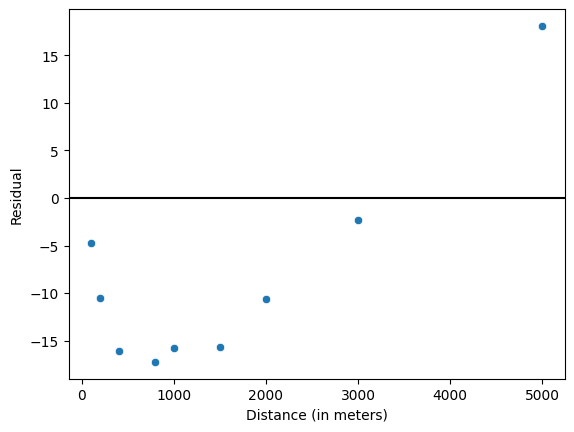

In [9]:
sns.scatterplot(x=dist, y=results.resid)
plt.ylabel("Residual")
plt.axhline(y = 0, color = 'k')

Even though the value of the correlation coefficient is very close to 1, when the residualsfrom the least-squares line are plotted, there is a definite curved pattern.

# 5.4 Nonlinear relationships and transformations
Common nonlinear functions: 
- quadratic function
- square root function
- reciprocal function
- logarithmic function
- exponential function
- power function

Examples: 
1. Models that involve transforming only 𝑥: quadratic regression model $\hat{y} = 𝑎+𝑏_1 𝑥+𝑏_2 𝑥^2$.Similarly, a measure that is useful for assessing fit is $R^2 = 1 − \frac{SSResid}{SSTo} = 1- \frac{\sum (𝑦−\hat{y})^2}{\sum (𝑦 − \overline{y})^2}$.
The square root, reciprocal, and log models all have the form $\hat{y} = 𝑎+𝑏∙(\text{some function of }𝑥)$, where the function of 𝑥 is square root, reciprocal, or log.
2. Models that involve transforming only y: logit regression model: $y \in \{0,1\}$, $P(y=1) = \phi(𝑎+bx)$ where $\phi(𝑎+bx) = \frac{e^{𝑎+bx}}{1+e^{𝑎+bx}}$.